## **Predicting Loan Payback**

- This project is a `kaggle` competition task that aims on predicting loan payback. It checks if the loan borrowed will be returned or not.
- I will be doing EDA, Data Preprocessing, training the model and giving report.


In [19]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile

**Loading the dataset...**

In [20]:
zip_path = r"C:\Users\Welcome Sir\Downloads\playground-series-s5e11.zip"

with ZipFile(zip_path, "r") as zip_ref:
    zip_ref.printdir()

File Name                                             Modified             Size
sample_submission.csv                          2025-10-28 23:08:48      2291139
test.csv                                       2025-10-28 23:08:48     23021430
train.csv                                      2025-10-28 23:08:50     55988519


In [21]:
# Loading the "test" and "train" data

with ZipFile(zip_path) as z:
    with z.open('train.csv') as f:
        train_data = pd.read_csv(f)
        print("\nTrain data successfully loaded...")
        
    with z.open('test.csv') as f:
        train_data = pd.read_csv(f)
        print("\nTest data successfully loaded...")


Train data successfully loaded...

Test data successfully loaded...


**Preliminary Data Analysis and Cleaning**

In [22]:
# Let's copy the file into df
df = train_data.copy()

# Display the first 6 rows
print("\nDisplaying the first 6 rows:\n")
df.head(6)


Displaying the first 6 rows:



,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade
0,593994,28781.05,0.049,626,11461.42,14.73,Female,Single,High School,Employed,Other,D5
1,593995,46626.39,0.093,732,15492.25,12.85,Female,Married,Master's,Employed,Other,C1
2,593996,54954.89,0.367,611,3796.41,13.29,Male,Single,Bachelor's,Employed,Debt consolidation,D1
3,593997,25644.63,0.110,671,6574.30,9.57,Female,Single,Bachelor's,Employed,Debt consolidation,C3
4,593998,25169.64,0.081,688,17696.89,12.80,Female,Married,PhD,Employed,Business,C1
5,593999,45302.90,0.060,675,8106.78,13.74,Female,Married,High School,Employed,Vacation,C3


In [23]:
# Checking for the dataset shape
print("\nChecking for the shape of data:")
rows, columns = df.shape
print("Number of rows:",rows)
print("Number of columns:",columns)


Checking for the shape of data:
Number of rows: 254569
Number of columns: 12


In [24]:
# Checking for missing values
missing_values = df.isna().sum()
if missing_values.sum() > 0:
    print(f"The number of missing values: {missing_values}")
else:
    print("No missing values in the data. Hence, nothing to handle.")


No missing values in the data. Hence, nothing to handle.


In [25]:
# Check for duplicates
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"Percentage of duplicates: {(duplicates/len(df)) * 100:.2f}%")
else:
    print("No duplicates found in the data.")

No duplicates found in the data.


In [26]:
# Getting the description of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,254569.0,721278.000000,73487.884676,593994.000,657636.000,721278.000,784920.000,848562.000
annual_income,254569.0,48233.080193,26719.658580,6011.770,27950.300,46528.980,61149.440,380653.940
debt_to_income_ratio,254569.0,0.120583,0.068582,0.011,0.072,0.096,0.156,0.627
credit_score,254569.0,681.037691,55.624118,395.000,646.000,683.000,719.000,849.000
loan_amount,254569.0,15016.753484,6922.165182,500.050,10248.580,15000.220,18831.460,48959.260
interest_rate,254569.0,12.352323,2.017602,3.200,10.980,12.370,13.690,21.290


**Exploratory Data Analysis**

In [27]:
# Let's separate our columns to numerical and categorical.

num_col = df.select_dtypes(include=["number"]).columns
print(num_col)

cat_col = df.select_dtypes(include=["object"]).columns
print(f"\n{cat_col}")



Index(['id', 'annual_income', 'debt_to_income_ratio', 'credit_score',
       'loan_amount', 'interest_rate'],
      dtype='object')

Index(['gender', 'marital_status', 'education_level', 'employment_status',
       'loan_purpose', 'grade_subgrade'],
      dtype='object')


In [28]:
# I want to perform the description on the categorical features as well.
for col in cat_col:
    print("Feature:", col)
    print("-------------------------")
    print(df[col].value_counts())
    print("")

Feature: gender
-------------------------
gender
Female    131480
Male      121447
Other       1642
Name: count, dtype: int64

Feature: marital_status
-------------------------
marital_status
Single      123686
Married     119000
Divorced      9122
Widowed       2761
Name: count, dtype: int64

Feature: education_level
-------------------------
education_level
Bachelor's     119924
High School     78687
Master's        39826
Other           11325
PhD              4807
Name: count, dtype: int64

Feature: employment_status
-------------------------
employment_status
Employed         193207
Unemployed        26715
Self-employed     22543
Retired            7060
Student            5044
Name: count, dtype: int64

Feature: loan_purpose
-------------------------
loan_purpose
Debt consolidation    138963
Other                  27715
Car                    24889
Home                   18984
Education              15719
Business               15076
Medical                 9618
Vacation           

In [29]:
# Here, I will be using histograms and box plots on visualizing the numerical features only while using scatter plots on categorical features

def numerical_relationship(data, column):
    # Stating the figure size
    plt.figure(figsize=(12,6))
    print("Visual Distribution of the Numerical Features")
    
    # Plotting Histogram
    plt.subplot(1,2,1)
    sns.histplot(data=df, x= df[column], kde=True, bins=30)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    
    # Plotting Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(data=df, x=df[column])
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Skewness of {column} is: {df[column].skew():.3f}\n")


Visual Distribution of the Numerical Features


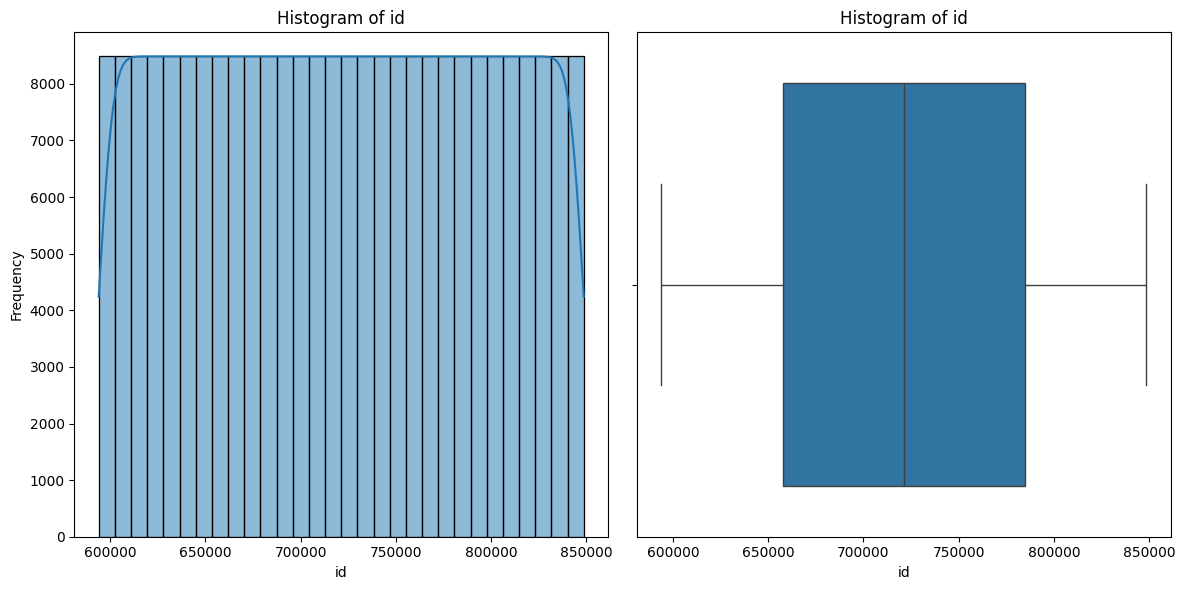

Skewness of id is: -0.000

Visual Distribution of the Numerical Features


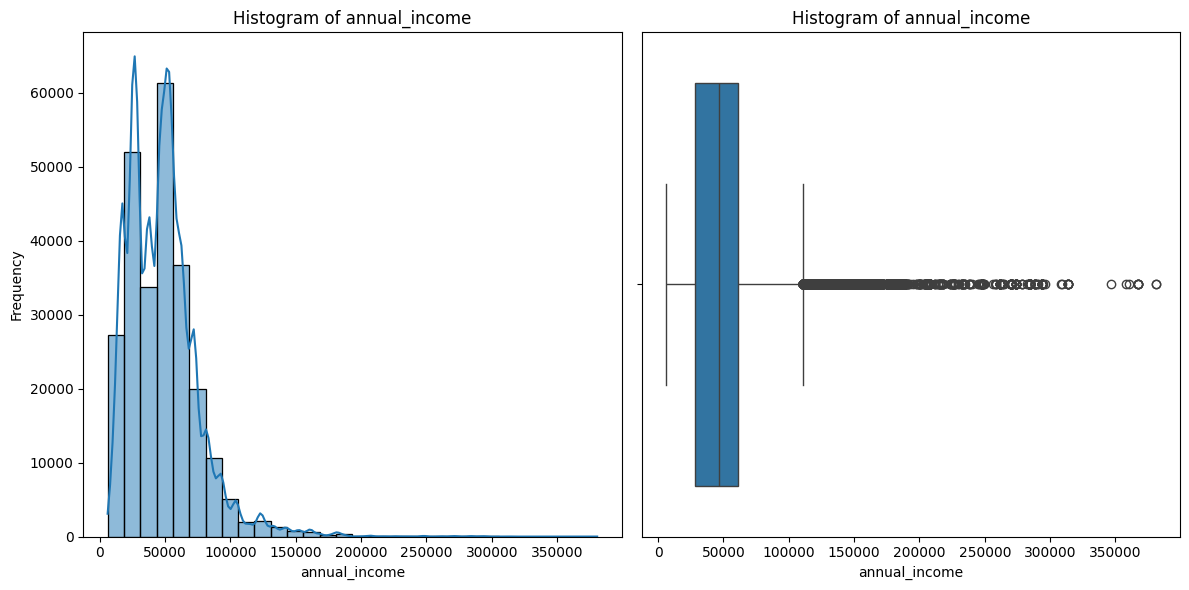

Skewness of annual_income is: 1.721

Visual Distribution of the Numerical Features


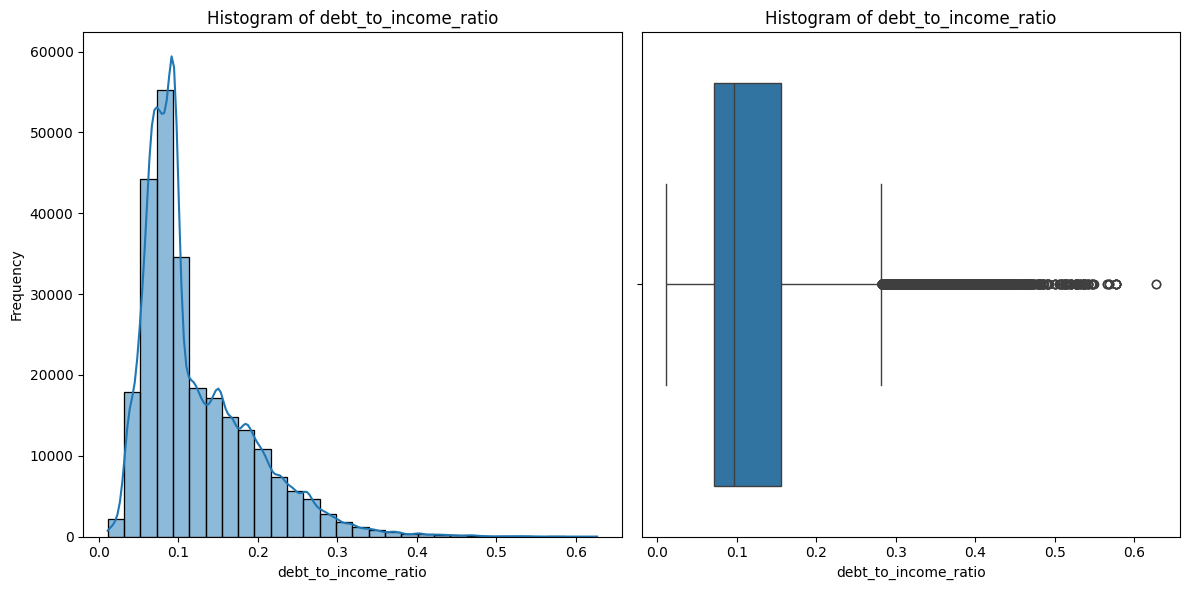

Skewness of debt_to_income_ratio is: 1.420

Visual Distribution of the Numerical Features


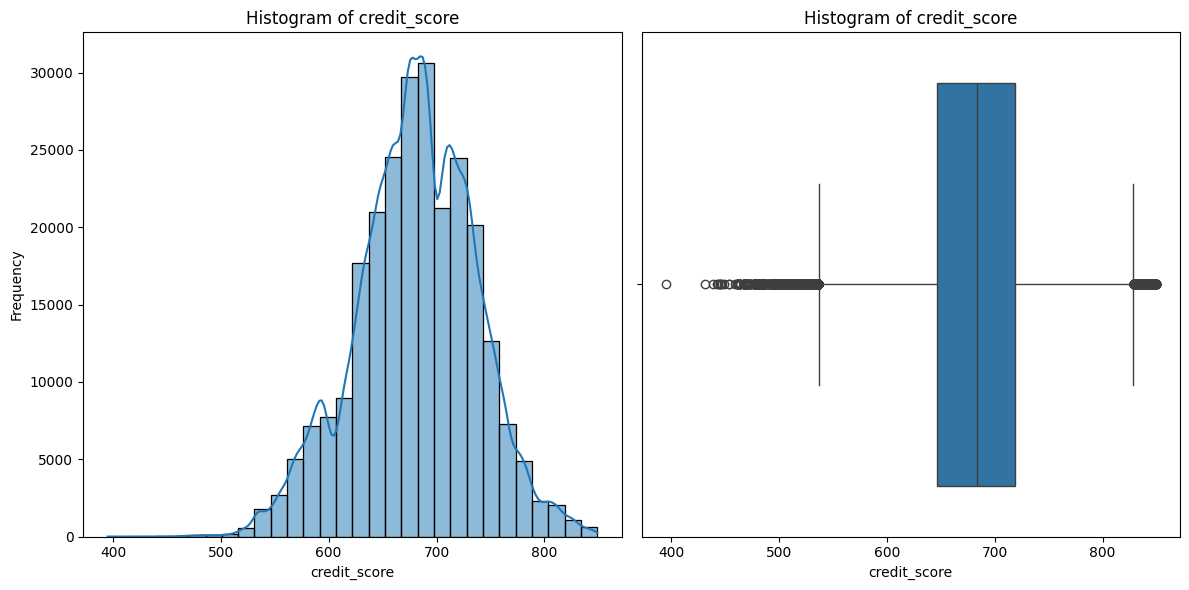

Skewness of credit_score is: -0.172

Visual Distribution of the Numerical Features


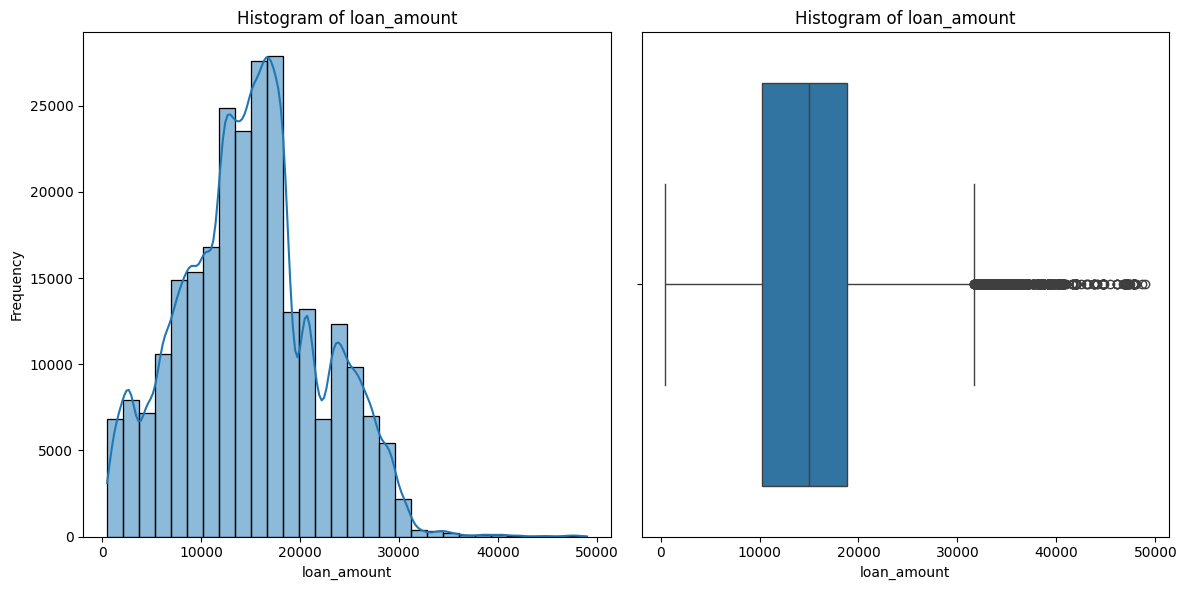

Skewness of loan_amount is: 0.206

Visual Distribution of the Numerical Features


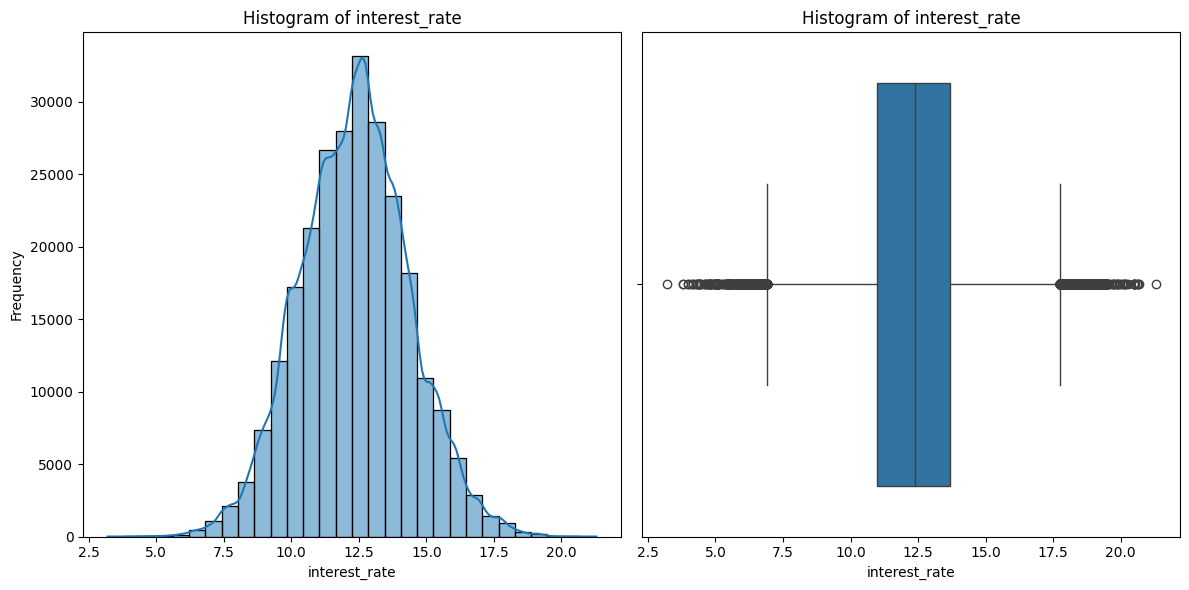

Skewness of interest_rate is: 0.043



In [30]:
for col in num_col:
    numerical_relationship(df, col)

**Checking the distribution for categorical features**

In [32]:
def categorical_distribution(df, feature):
    for col in cat_col:
        plt.figure(figsize=(6,4))
        sns.countplot(data=df, x=df[col], hue=col)
        plt.title(f"Distribution of {col}")

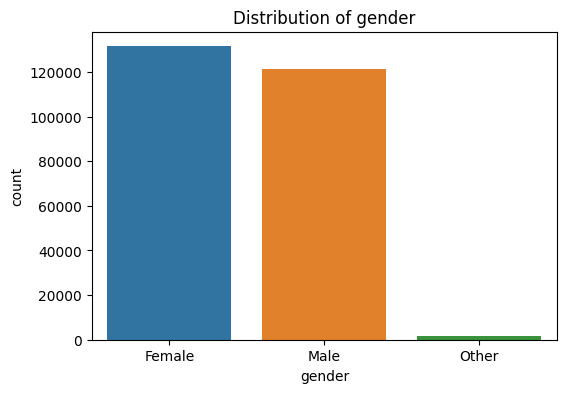

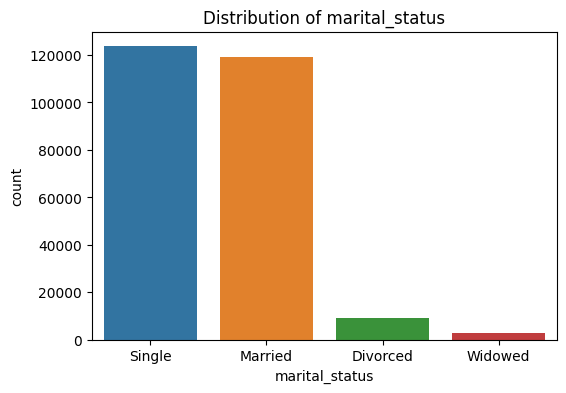

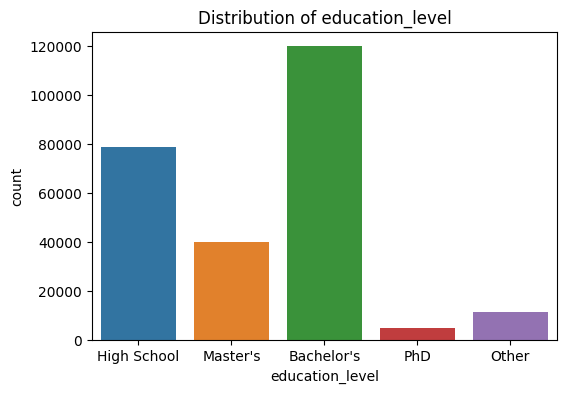

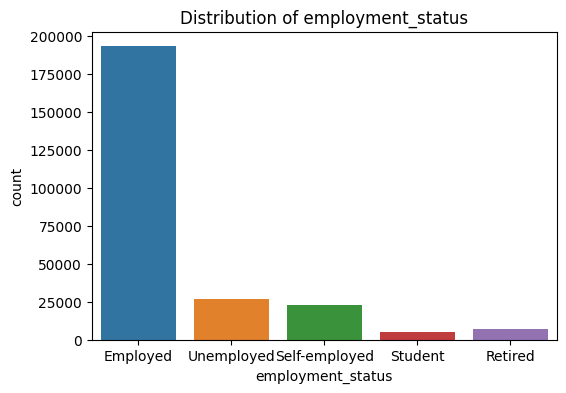

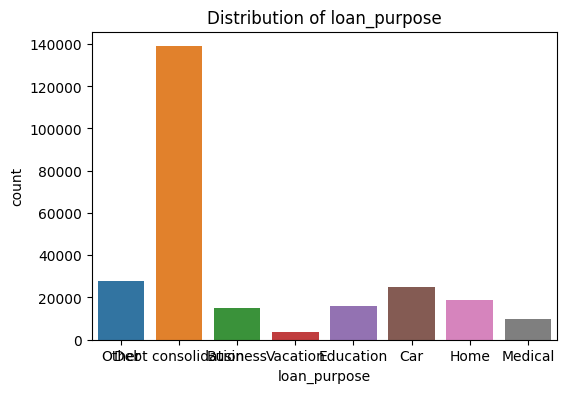

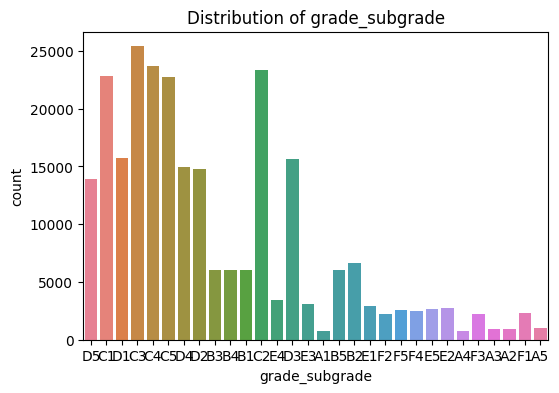

In [33]:
# Calling the function to print them out
categorical_distribution(df, cat_col)